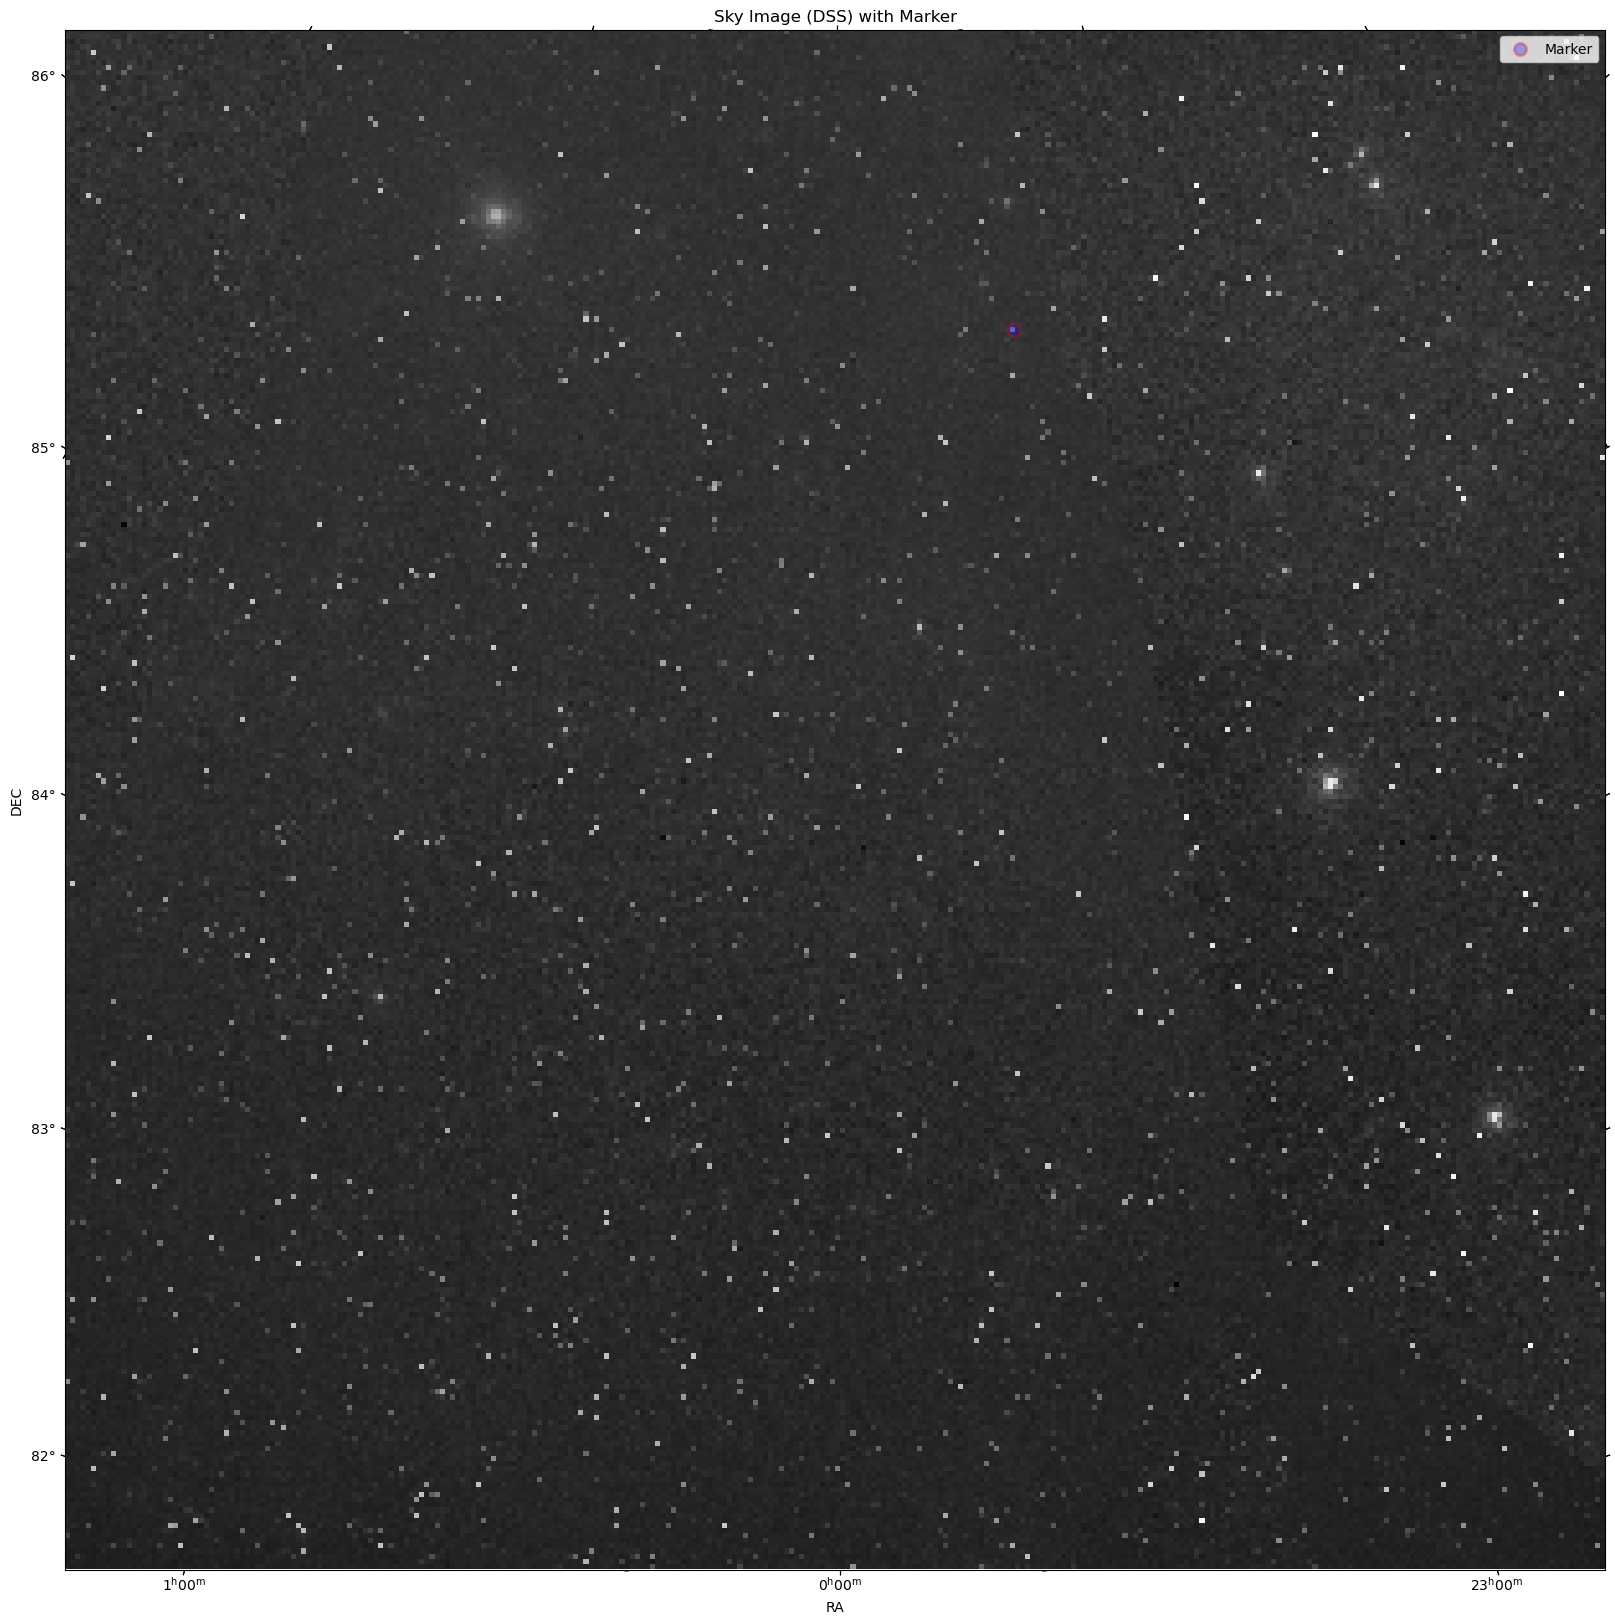

In [22]:
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

# Define the central RA, DEC and field of view (FoV) for the image
central_ra = 0.10666666666666667  # Example RA in degrees
central_dec = 84.52777777777777  # Example DEC in degrees
fov = 2.5  # Example field of view in degrees

# Define the specific RA and DEC for the marker
marker_ra = 351.7704483319104  # Specific RA for marker
marker_dec = 86.00822751465697  # Specific DEC for marker

# Construct a SkyCoord object for central coordinates and marker
center_coord = SkyCoord(ra=central_ra * u.deg, dec=central_dec * u.deg, frame='icrs')
marker_coord = SkyCoord(ra=marker_ra * u.deg, dec=marker_dec * u.deg, frame='icrs')

# Define the survey you want to fetch the image from (e.g., DSS)
survey = 'DSS'  # You can change this to other surveys supported by SkyView

# Query SkyView to fetch the image
images = SkyView.get_images(position=center_coord, survey=survey, coordinates='icrs', radius=fov * u.deg)

# Check if images were retrieved
if len(images) > 0:
    # Assuming only one image is returned (first image)
    first_image = images[0]
    
    # Get the HDUList object from the returned image
    hdulist = first_image[0]
    
    # Extract the image data (2D array) and WCS information
    image_data = hdulist.data
    wcs = WCS(hdulist.header)
    
    # Plot the image using matplotlib with WCS projection
    plt.figure(figsize=(20, 20))
    ax = plt.subplot(projection=wcs)
    ax.imshow(image_data, origin='lower', cmap='gray')
    
    # Convert marker coordinates to pixel coordinates
    marker_pix = wcs.world_to_pixel_values(marker_ra, marker_dec)
    marker_x, marker_y = marker_pix
    
    # Add a marker (red dot) at the specified coordinates
    ax.scatter(marker_x, marker_y, s=80, color='blue', marker='o', label='Marker', alpha=0.3, edgecolors='red', linewidths=2)
    
    # Add labels and legend
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    plt.title(f'Sky Image ({survey}) with Marker')
    plt.legend()
    
    # Save the plot as an image file (optional)
    plt.savefig('sky_image_with_marker.png')
    
    # Display the plot
    plt.show()

else:
    print("No images found.")

In [21]:
from astroquery.gaia import Gaia

# Define the GAIA ID
gaia_id = 2301234135644868352

# Construct the query
query = f"""
SELECT source_id, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE source_id = {gaia_id}
"""

# Run the query
job = Gaia.launch_job(query)
results = job.get_results()

# Print the G band magnitude
g_band_mag = results['phot_g_mean_mag'][0]
print(f"G band magnitude for GAIA ID {gaia_id}: {g_band_mag}")

G band magnitude for GAIA ID 2301234135644868352: 7.3578362464904785


In [6]:
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define central RA, DEC and field of view (FoV) for the image
central_ra = 0.10666666666666667  # Example RA in degrees
central_dec = 84.52777777777777  # Example DEC in degrees
fov = 0.2  # Example field of view in degrees

# Query GAIA DR3 for sources within the specified FoV
radius = fov / 2  # Radius in degrees

job = Gaia.cone_search_async(central_ra, central_dec, radius)
gaia_results = job.get_results()

# Extract RA and DEC from GAIA results
ra = gaia_results['ra'].data * u.deg
dec = gaia_results['dec'].data * u.deg

# Plot the sources on the sky
plt.figure(figsize=(8, 8))
plt.scatter(ra, dec, s=1, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title(f'GAIA DR3 Field of View (RA={central_ra}, DEC={central_dec}, FoV={fov} deg)')
plt.grid(True)
plt.show()

TypeError: GaiaClass.cone_search_async() takes 2 positional arguments but 4 were given

In [59]:
%cd "/home/dutta/Downloads/Summer'24"

/home/dutta/Downloads/Summer'24


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Path to your .fit.fz file
file_path = 'dnb02461_mosaic_00_01ww_tnx.fit.fz'

# Open the .fit.fz file
with fits.open(file_path, lazy_load_hdus=False) as hdul:
    # Print information about the file
    hdul.info()
    
    # Extract the image data from the COMPRESSED_IMAGE HDU
    image_data = hdul[1].data

# Display the image using matplotlib
plt.figure(figsize=(87, 110))  # Adjust the figure size if needed
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('FITS Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')

# Save the plot as an .svg file
plt.savefig('fits_image.png', format='svg', bbox_inches='tight')

# Show the plot (optional, can be commented out if not needed)
# plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Path to your .fit.fz file
file_path = 'dnb02461_mosaic_00_01ww_tnx.fit.fz'

# Open the .fit.fz file
with fits.open(file_path, lazy_load_hdus=False) as hdul:
    # Print information about the file
    hdul.info()
    
    # Print the header of the primary HDU
    primary_header = hdul[0].header
    print("Primary HDU Header:")
    print(repr(primary_header))
    
    # Print the header of the compressed image HDU
    compressed_header = hdul[1].header
    print("\nCompressed Image HDU Header:")
    print(repr(compressed_header))
    
    # Extract the image data from the COMPRESSED_IMAGE HDU
    image_data = hdul[1].data

# # Display the image using matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(image_data, cmap='gray', origin='lower')
# plt.colorbar()
# plt.title('FITS Image')
# plt.xlabel('X Pixel')
# plt.ylabel('Y Pixel')
# plt.show()

Filename: dnb02461_mosaic_00_01ww_tnx.fit.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    127   (17402, 21953)   int16   
Primary HDU Header:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CHECKSUM= '2cI55Z932bG32Z93'   / HDU checksum updated 2023-07-24T02:08:19       
DATASUM = '         0'         / data unit checksum updated 2023-07-24T02:08:19 

Compressed Image HDU Header:
SIMPLE  =                    T / file does conform to FITS standard  

In [30]:
!git clone https://github.com/pkgw/daschlab.git

Cloning into 'daschlab'...
remote: Enumerating objects: 440, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 440 (delta 13), reused 18 (delta 7), pack-reused 406
Receiving objects: 100% (440/440), 158.26 KiB | 4.65 MiB/s, done.
Resolving deltas: 100% (265/265), done.


In [43]:
!python -h

usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Options (and corresponding environment variables):
-b     : issue warnings about str(bytes_instance), str(bytearray_instance)
         and comparing bytes/bytearray with str. (-bb: issue errors)
-B     : don't write .pyc files on import; also PYTHONDONTWRITEBYTECODE=x
-c cmd : program passed in as string (terminates option list)
-d     : turn on parser debugging output (for experts only, only works on
         debug builds); also PYTHONDEBUG=x
-E     : ignore PYTHON* environment variables (such as PYTHONPATH)
-h     : print this help message and exit (also -? or --help)
-i     : inspect interactively after running script; forces a prompt even
         if stdin does not appear to be a terminal; also PYTHONINSPECT=x
-I     : isolate Python from the user's environment (implies -E and -s)
-m mod : run library module as a script (terminates option list)
-O     : remove assert and __debug__-dependent statements; add .opt-1 bef

In [51]:
!pip3 install --force-reinstall --no-cache-dir pycairo
!pip install pycairo==1.20
!pip install astropy==6.1.0

DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pywwt-0.24.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/daschlab-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pytz-2024.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 9.5 MB/s eta 0:00:009.0 MB/s eta 0:00:01
  Installing bu

In [54]:
!pip install pywwt

DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pywwt-0.24.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/daschlab-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pytz-2024.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [55]:
!pip3 install .

DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pywwt-0.24.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/daschlab-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pytz-2024.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Processing /home/dutta/Downloads/Summer'24/daschlab
  Installing build dependencies ... done
  Getting requirements 

In [56]:
# Get the main module:
import daschlab

# Set up Bokeh plots:
from bokeh.io import output_notebook
output_notebook()

# Get some other imports that will be useful:
from astropy import units as u
from bokeh.plotting import figure, show
import numpy as np
from daschlab.lightcurves import AFlags, BFlags

ModuleNotFoundError: No module named 'pywwt'